# Warranty Claims Fraud Prediction

The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity. The dataset is taken from Kaggle. The dataset contains 358 rows and 21 columns. 

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv("DataSets/df_Clean.csv")
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


## Data Preprocessing Part 1

In [3]:
# checking the shape of the dataset
df.shape

(358, 21)

In [4]:
# Drop index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Checking for null/missing values
df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

In [7]:
# Checking the data types
df.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [8]:
# Unique values in each column
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [9]:
# renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

#### Descriptive Statistics

In [10]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [11]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No Issue,No Issue,No Issue,repair,replacement,No Issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,repair,repair,No Issue,No Issue,No Issue,No Issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No Issue,repair,replacement,No Issue,No Issue,No Issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No Issue,No Issue,No Issue,repair,repair,No Issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No Issue,No Issue,No Issue,No Issue,repair,replacement,25000.0,15,6,Dealer,1.3,Claim,0


## Exploratory Data Analysis

### Location based Distribution of Fraudulent Claims

[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]

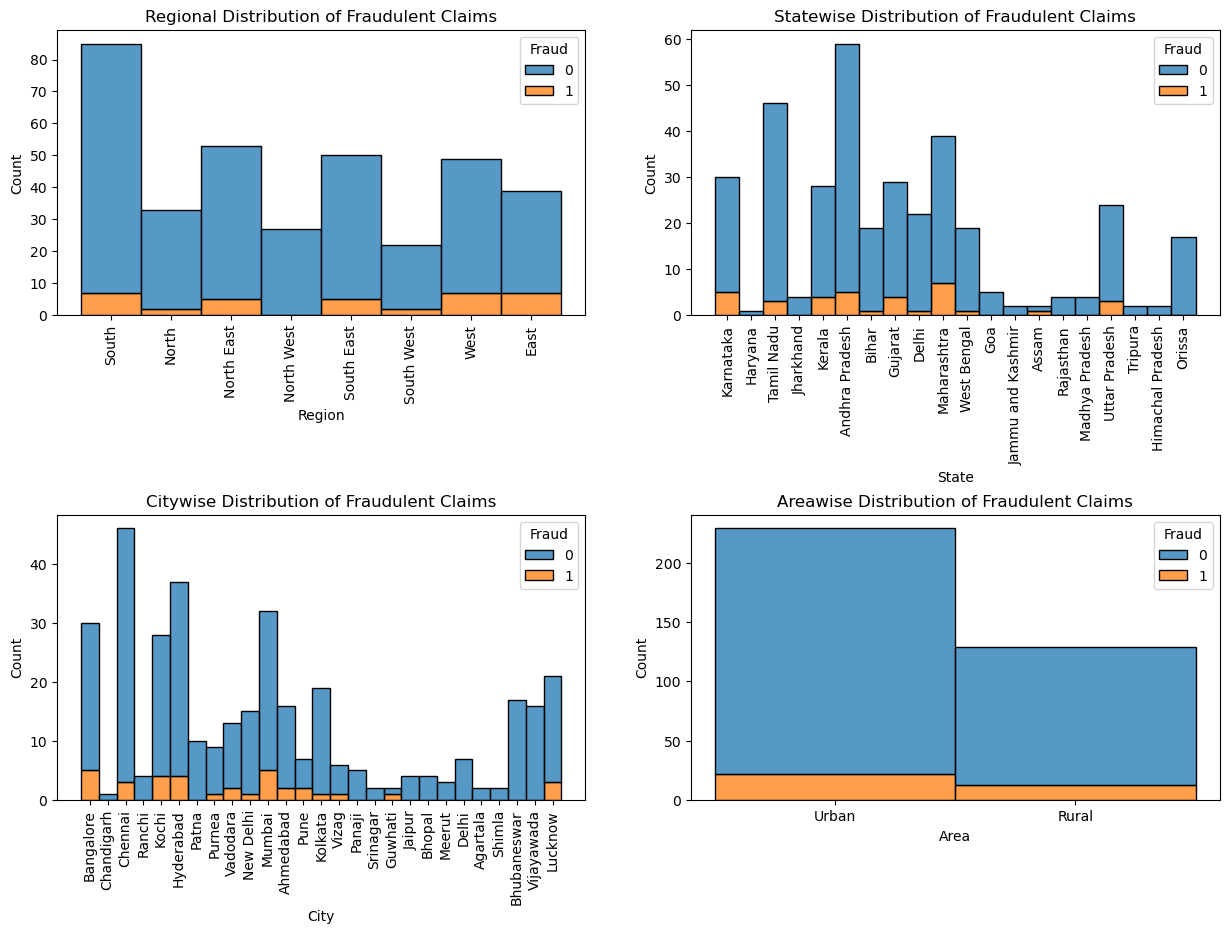

In [12]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = df, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='count',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = df, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='count',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = df, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='count',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='count',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')


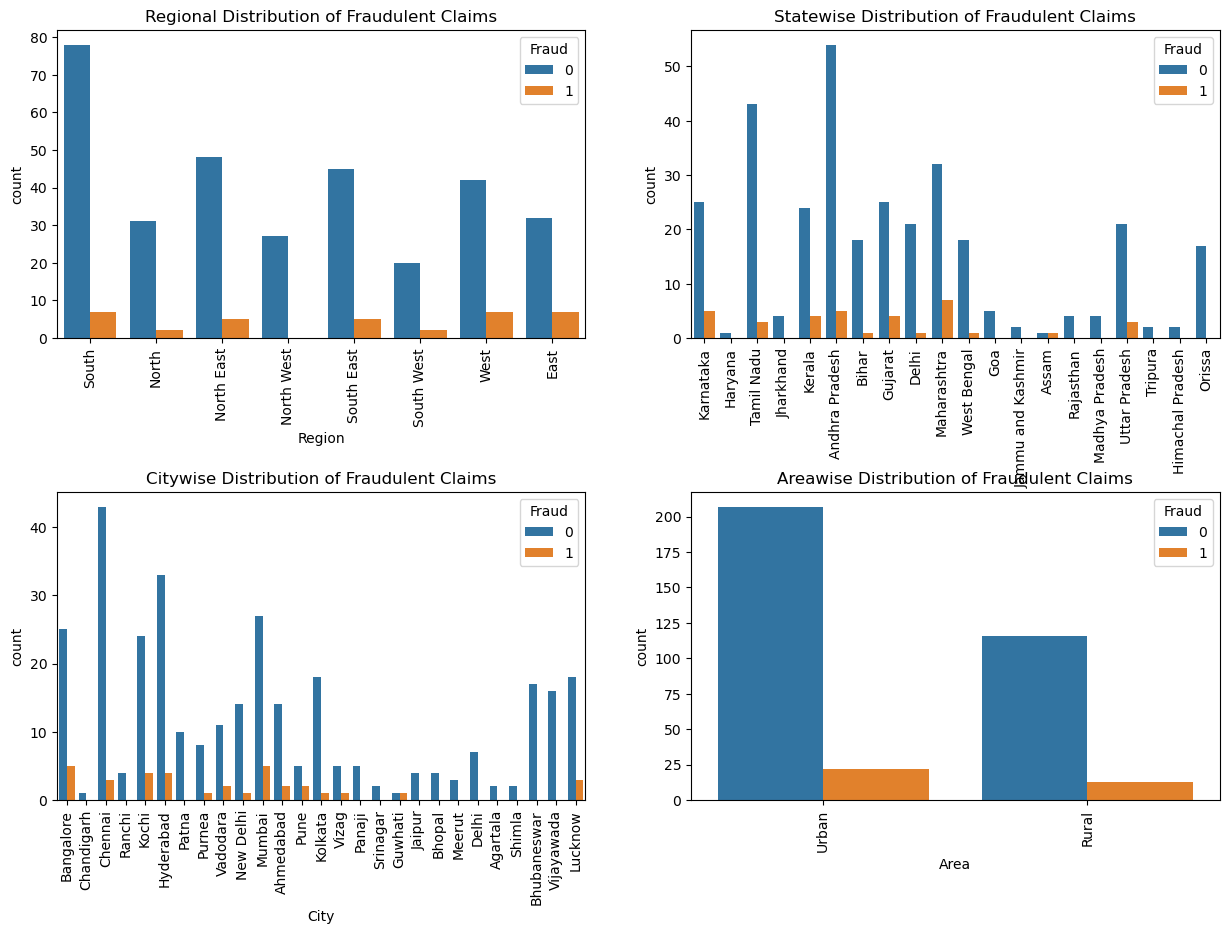

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)

# Region
sns.countplot(x='Region', data=df, hue='Fraud', ax=ax[0,0])
ax[0,0].set_title("Regional Distribution of Fraudulent Claims")
ax[0,0].tick_params(axis='x', rotation=90)

# State
sns.countplot(x='State', data=df, hue='Fraud', ax=ax[0,1])
ax[0,1].set_title("Statewise Distribution of Fraudulent Claims")
ax[0,1].tick_params(axis='x', rotation=90)

# City
sns.countplot(x='City', data=df, hue='Fraud', ax=ax[1,0])
ax[1,0].set_title("Citywise Distribution of Fraudulent Claims")
ax[1,0].tick_params(axis='x', rotation=90)

# Area
sns.countplot(x='Area', data=df, hue='Fraud', ax=ax[1,1])
ax[1,1].set_title("Areawise Distribution of Fraudulent Claims")
ax[1,1].tick_params(axis='x', rotation=90)

### Location-based Distribution of Fraudulent Claims

From the location-wise analysis of fraudulent claims, we observe the following:

* Regional level: Fraudulent claims are present across all regions. The South region and North East region show relatively higher proportions of fraudulent claims due to their larger claim volumes.

* State level: States like Karnataka, Kerala, Andhra Pradesh, Bihar, and Gujarat report more fraudulent claims. Fraud is concentrated in states with higher claim activity, indicating the need for localized fraud detection strategies.

* City level: Major metropolitan cities such as Bangalore, Chandigarh, Ranchi, Hyderabad, New Delhi, and Mumbai show significant fraudulent activity. Fraud is more prominent in larger cities, likely due to higher consumer density and claim volumes.

* Area level: Both Urban and Rural areas show fraudulent activity. However, urban areas report more fraud cases, which is consistent with higher claim submissions in cities compared to rural locations.

**Conclusion**: Fraudulent claims are not limited to one geography — they are spread across regions, states, and cities. However, fraud is disproportionately higher in high-claim regions, big states, and metropolitan cities. This suggests the need for region-specific fraud monitoring and stricter controls in urban centers.

### Consumer Profile and Fraudulent Claims

Text(0.5, 1.0, 'Consumer Profile distribution')

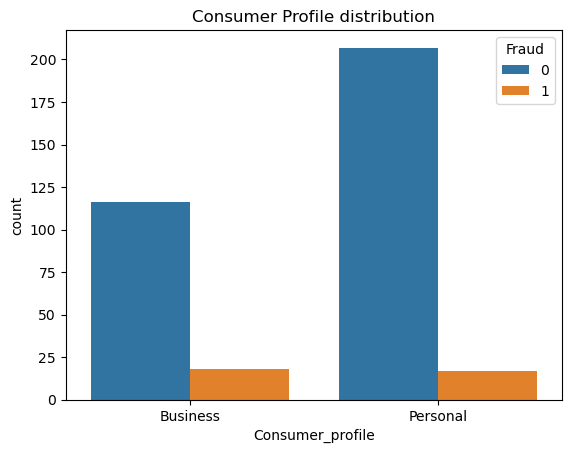

In [14]:
sns.countplot(x = 'Consumer_profile', data = df, hue = 'Fraud').set_title('Consumer Profile distribution')

### Consumer Profile vs. Fraudulent Claims

The chart illustrates warranty claims by Consumer Profile (Business vs. Personal) and distinguishes between Fraudulent (1) and Non-Fraudulent (0) claims.

- **Business Consumers**: Although they submit fewer claims overall, they exhibit a slightly higher proportion of fraudulent claims compared to Personal consumers.

- **Personal Consumers**: They dominate in terms of total claim volume, but the proportion of fraudulent claims among them is somewhat lower.

**Interpretation**:

- Fraudulent activity is more concentrated in Business consumer claims.

- This suggests that consumer type can provide useful predictive power, with Business claims requiring closer scrutiny in fraud detection models.

### Product and Fraudulent Claims

Text(0.5, 1.0, 'Product and Fraud Distribution')

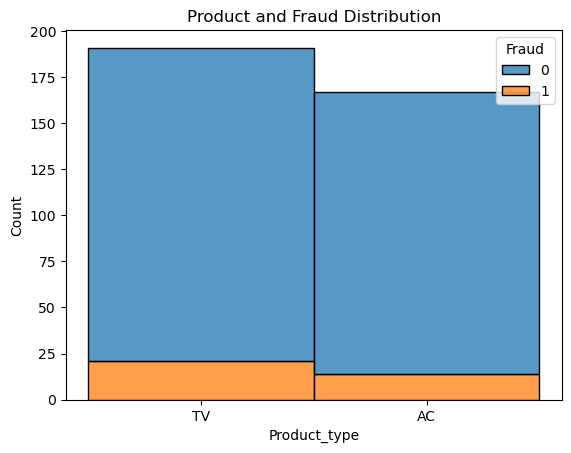

In [15]:
sns.histplot(x = 'Product_type', data = df, hue = 'Fraud', multiple='stack').set_title('Product and Fraud Distribution')

Product_type
AC     8.383234
TV    10.994764
Name: Fraud, dtype: float64


<Axes: title={'center': 'Fraud Percentage by Product Type'}, xlabel='Product_type'>

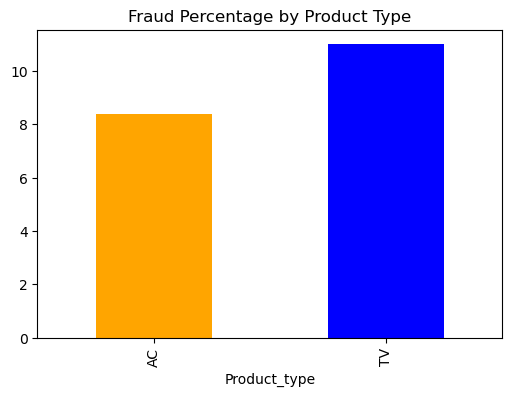

In [16]:
# Fraud percentage by Product Type
fraud_by_product = df.groupby('Product_type')['Fraud'].mean() * 100

print(fraud_by_product)

# plot it as a bar chart
fraud_by_product.plot(kind='bar', color=['orange', 'blue'], figsize=(6,4), title="Fraud Percentage by Product Type")


Although TVs have more claims overall, they also show a higher fraud rate 10.99% compared to ACs 8.38%. This suggests that fraud detection models should give more weight to product type, especially TVs.

### Issue with the Product Parts and Fraudulent Claims

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

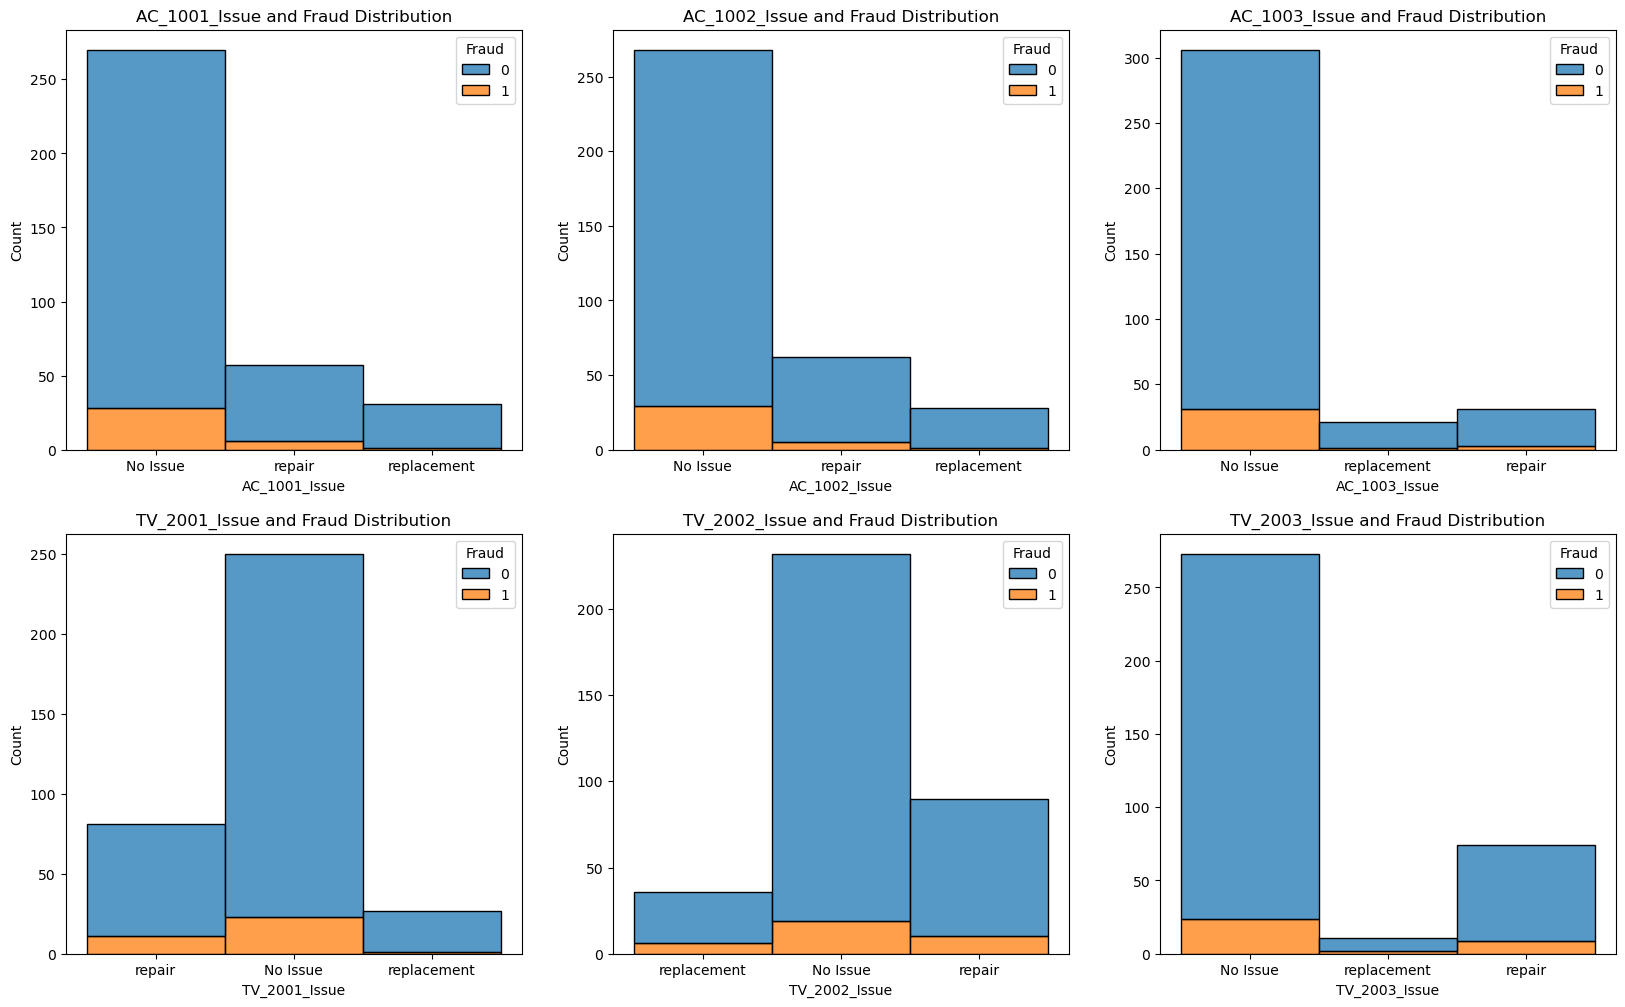

In [17]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

### Product Issue vs. Fraudulent Claims

The plots above show the distribution of fraudulent claims across different product issue categories for both **Air Conditioners (AC)** and **Televisions (TV)**.  

- The majority of claims fall into the **"No Issue"** category, which raises suspicion because customers are filing claims without reporting a valid product fault.  
- Fraudulent claims (orange bars) are most common in **"No Issue"** and **"Replacement"** cases.  
- **"Repair"** cases tend to have fewer fraudulent claims, suggesting they are relatively safer.  

**Conclusion:**  
Fraudulent claims are disproportionately higher in “No Issue” and “Replacement” categories. This insight can help companies flag high-risk claims early and train ML models to identify fraud-prone claim types more effectively.


In [18]:
# List of issue columns
issue_cols = [
    "AC_1001_Issue", "AC_1002_Issue", "AC_1003_Issue",
    "TV_2001_Issue", "TV_2002_Issue", "TV_2003_Issue"
]

# Calculate fraud rates for each issue type
fraud_rates = {}

for col in issue_cols:
    fraud_rate = (
        df.groupby(col)["Fraud"]
        .mean()  # mean of Fraud column gives fraud percentage
        .reset_index()
        .rename(columns={"Fraud": "Fraud_Rate"})
    )
    fraud_rates[col] = fraud_rate

# Display results
for col, rates in fraud_rates.items():
    print(f"\nFraud rates for {col}:")
    print(rates)



Fraud rates for AC_1001_Issue:
  AC_1001_Issue  Fraud_Rate
0      No Issue    0.103704
1        repair    0.105263
2   replacement    0.032258

Fraud rates for AC_1002_Issue:
  AC_1002_Issue  Fraud_Rate
0      No Issue    0.108209
1        repair    0.080645
2   replacement    0.035714

Fraud rates for AC_1003_Issue:
  AC_1003_Issue  Fraud_Rate
0      No Issue    0.101307
1        repair    0.096774
2   replacement    0.047619

Fraud rates for TV_2001_Issue:
  TV_2001_Issue  Fraud_Rate
0      No Issue    0.092000
1        repair    0.135802
2   replacement    0.037037

Fraud rates for TV_2002_Issue:
  TV_2002_Issue  Fraud_Rate
0      No Issue    0.081897
1        repair    0.111111
2   replacement    0.166667

Fraud rates for TV_2003_Issue:
  TV_2003_Issue  Fraud_Rate
0      No Issue    0.087912
1        repair    0.121622
2   replacement    0.181818


### Service Center and Fraudulent Claims

Text(0.5, 1.0, 'Service Centre and Fraudulent Claims')

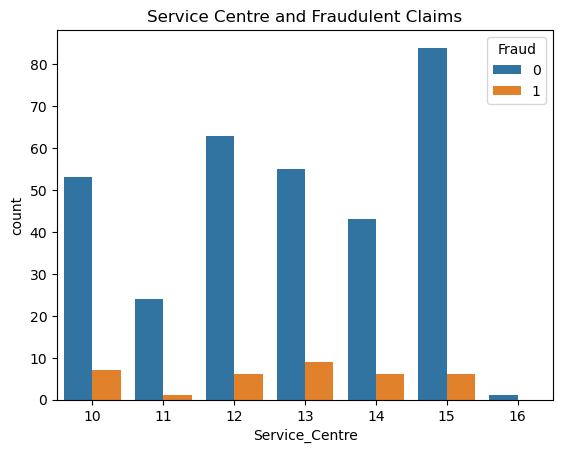

In [19]:
sns.countplot(x = 'Service_Centre', data = df, hue = 'Fraud').set_title('Service Centre and Fraudulent Claims')

### Service Centre vs. Fraudulent Claims

The above plot shows the distribution of fraudulent and genuine claims across service centres.

- **Service Centre 13** has the **highest number of fraudulent claims** compared to all other centres.  
- **Service Centre 15** has the highest overall claims, but most of them are genuine.  
- Service Centres **10, 12, and 14** also show noticeable fraudulent activity.  
- Service Centres **11 and 16** have very low fraud numbers.

**Conclusion:**  
Fraudulent activity is **concentrated at Service Centre 13**. This indicates potential weaknesses in fraud-checking mechanisms at that centre. For the model, `Service_Centre` is an important feature because fraud patterns vary across centres.


### Claim Value and Fraudulent Claims

Text(0.5, 1.0, 'Claim Value and Fraudulent Claims')

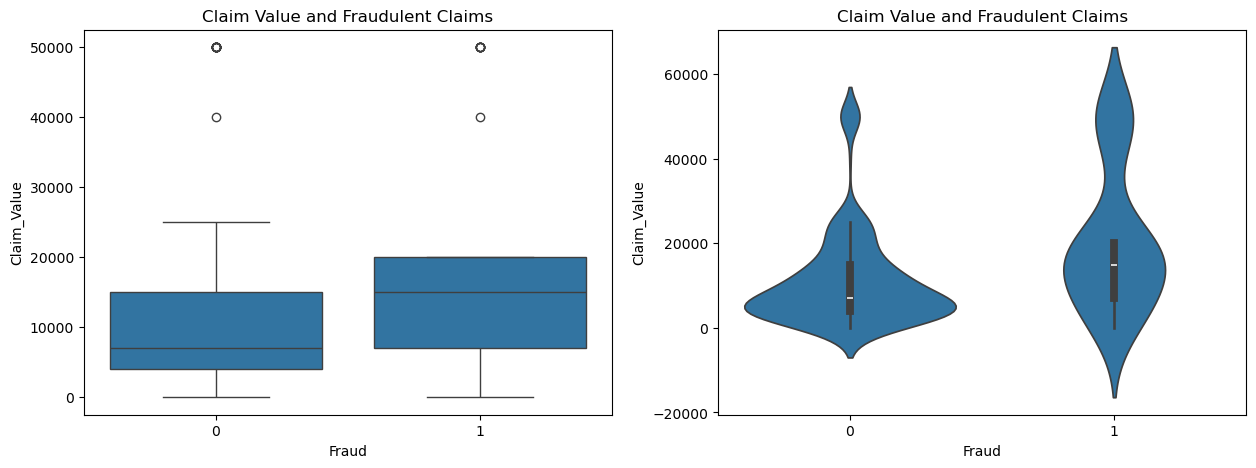

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[0]).set_title('Claim Value and Fraudulent Claims')

sns.violinplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[1]).set_title('Claim Value and Fraudulent Claims')

### Claim Value vs. Fraudulent Claims

The plots above compare the distribution of claim values for fraudulent (1) and genuine (0) claims.

- Fraudulent claims generally involve **higher claim values** than genuine claims.  
- The **boxplot** shows that the median claim value for fraud is higher, and fraud cases display a wider spread of values.  
- The **violin plot** reveals that fraudulent claims are more concentrated at higher values, whereas genuine claims cluster around smaller amounts.  
- This suggests that fraudsters may be inflating claim values to maximize payouts.

**Conclusion:**  
`Claim_Value` is a strong feature for detecting fraud. Fraudulent claims are not only more variable but also tend to involve higher amounts compared to genuine claims.


### Product Age and Fraudulent Claims

Text(0.5, 1.0, 'Product Age(in days) and Fraud Distribution')

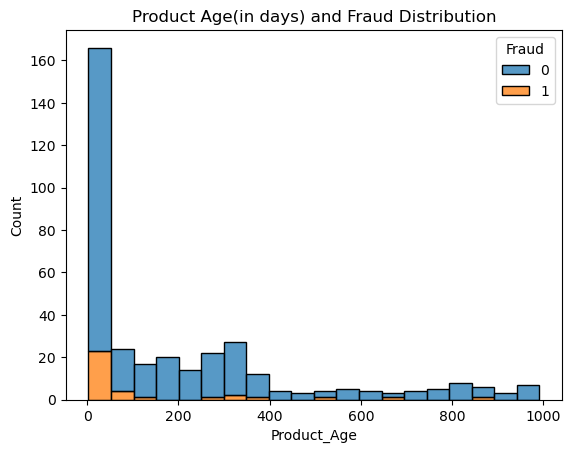

In [21]:
sns.histplot(x = 'Product_Age', data = df, hue = 'Fraud', multiple='stack', bins = 20).set_title('Product Age(in days) and Fraud Distribution')

### Product Age vs. Fraudulent Claims

The histogram shows how fraudulent and genuine claims are distributed across product ages (in days).

**Key Observations:**
- Most claims occur **within the first 100 days of product usage**. Fraudulent claims are also most frequent in this range.  
- Fraudulent claims decrease sharply as product age increases, and they are rare beyond ~600 days.  
- This suggests that fraudsters are more likely to file claims **when the product is very new**, probably to exploit easy replacement policies.

**Conclusion:**  
`Product_Age` is a useful feature for fraud detection.  
Newer products (<100 days) are riskier, so models can give higher fraud probability for claims in this range.


### Purchase point and Fraudulent Claims

Text(0.5, 1.0, 'Purchased from and Fraudulent Claims')

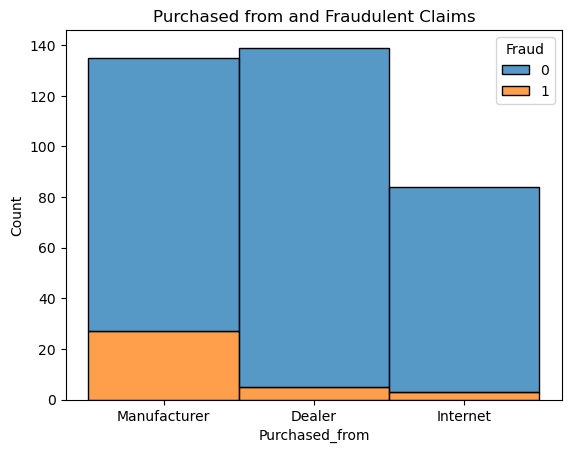

In [22]:
sns.histplot(x = 'Purchased_from', data = df, hue = 'Fraud', multiple='stack').set_title('Purchased from and Fraudulent Claims')

## Purchased From vs Fraudulent Claims

### Observations from the plot:
- **Manufacturer**
  - Has the **highest number of fraudulent claims** compared to Dealer and Internet.
  - Fraud cases are significant here.

- **Dealer**
  - Has the **highest overall number of claims** (both fraud and non-fraud).
  - Most claims are **legitimate** with very few fraud cases.

- **Internet**
  - Has the **lowest number of total claims** overall.
  - Fraud cases are very rare here.

### Key Insight
- Fraudulent claims are **most common when products are purchased from Manufacturer**.  
- **Dealer** contributes the largest volume of claims, but they are mostly genuine.  
- **Internet** has the least claims and very few frauds.



### Call Duration and Fraudulent Claims

Text(0.5, 0, 'Call Duration(in mins)')

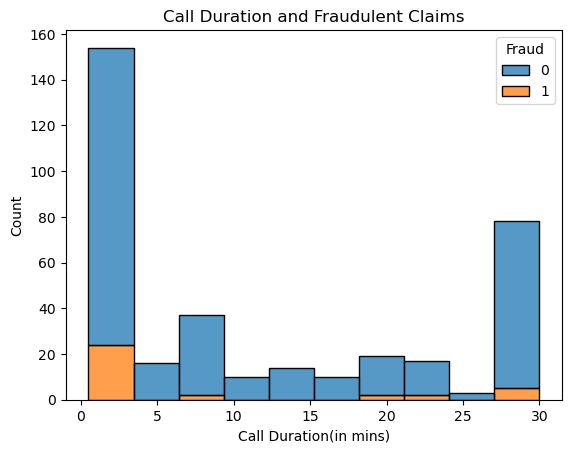

In [23]:
sns.histplot(x = 'Call_details', data = df, hue = 'Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')

### Call Duration vs Fraudulent Claims

The visualization below shows the distribution of claims based on **call duration (in minutes)**, split into fraudulent and genuine cases:

- **Observation**:  
  - A large number of calls have very short durations (0–3 minutes).  
  - Fraudulent claims (orange bars) are more frequent in these shorter calls.  
  - Calls with medium duration (5–20 minutes) have relatively fewer fraud cases.  
  - An unusual spike appears at around 30 minutes, but these are mostly genuine claims.  

- **Insight**:  
  Fraudulent claims are **more likely linked to unusually short calls**. This feature could be an important factor in fraud detection models, as short call durations may indicate suspicious activity.


### Purpose of contact and Fraudulent Claims

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

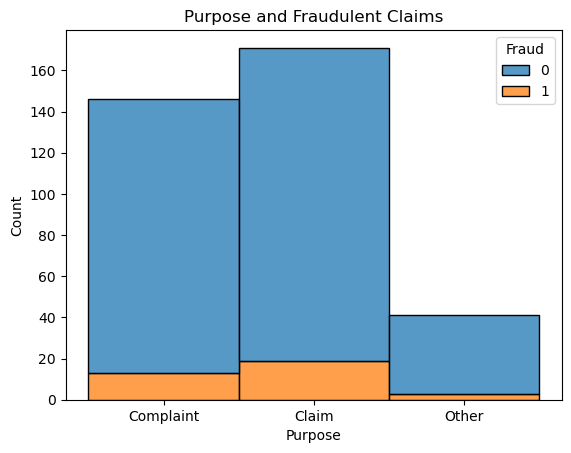

In [24]:
sns.histplot(x = 'Purpose', data = df, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')

### Purpose of Contact vs Fraudulent Claims

The bar plot shows the distribution of fraudulent and non-fraudulent claims based on the **purpose of customer contact**:

- **Observation**:  
  - The **"Claim"** category has the highest number of fraudulent cases compared to other purposes.  
  - The **"Complaint"** category also shows some fraud but at a lower level than "Claim".  
  - The **"Other"** category has very few fraudulent cases.  

- **Insight**:  
  Customers reporting **Claims** are much more likely to be involved in fraud compared to those contacting for **Complaints** or other reasons.  
  This suggests that **purpose of contact** is a valuable feature in predicting fraud risk.


## Data Preprocessing Part 2

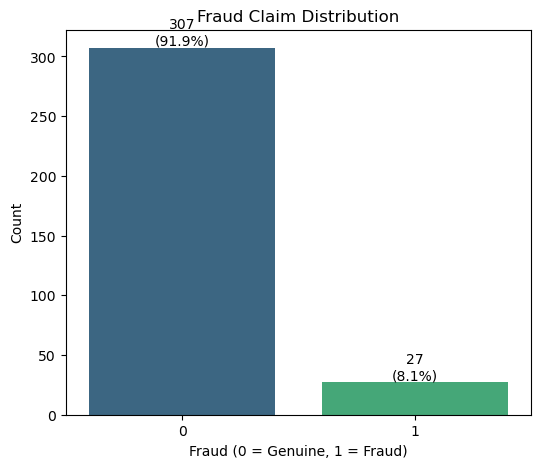

Fraud
0    307
1     27
Name: count, dtype: int64

In [50]:
plt.figure(figsize=(6,5))

# Explicitly assign hue to avoid warning
ax = sns.countplot(x='Fraud', data=df, hue='Fraud', palette='viridis', legend=False)

# Add counts & percentages on top of bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{count}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Fraud Claim Distribution')
plt.xlabel('Fraud (0 = Genuine, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

df['Fraud'].value_counts()


### Outlier Removal

In [25]:
# Removing outliners from claim value column using IQR method

Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) |(df['Claim_Value'] > (Q3 + 1.5 * IQR)))]

### Label Encoding the Object Datatypes

In [53]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Dictionary to store all encoders
encoders = {}

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:
    le = LabelEncoder()  # Create new encoder for each column
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
    # Store the encoder in the dictionary
    encoders[col] = le
    
    print(col, df[col].unique())

# Saving the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("✅ Encoders saved successfully!")

✅ Encoders saved successfully!


In [54]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,4,10,1,2,0,0,1,0,0,0,1,2,0,15000.0,10,60,2,0.5,1,1
1,4,10,0,2,0,1,0,1,1,0,0,0,0,20000.0,12,10,0,1.0,1,0
2,1,6,1,5,1,1,0,0,1,2,0,0,0,18000.0,14,10,0,1.4,0,0
3,4,16,1,6,0,0,1,0,0,0,1,1,0,12000.0,16,20,2,2.0,1,0
4,2,9,0,21,1,0,1,0,0,0,0,1,2,25000.0,15,6,0,1.3,0,0


## Correlation Matrix Heatmap

<Axes: >

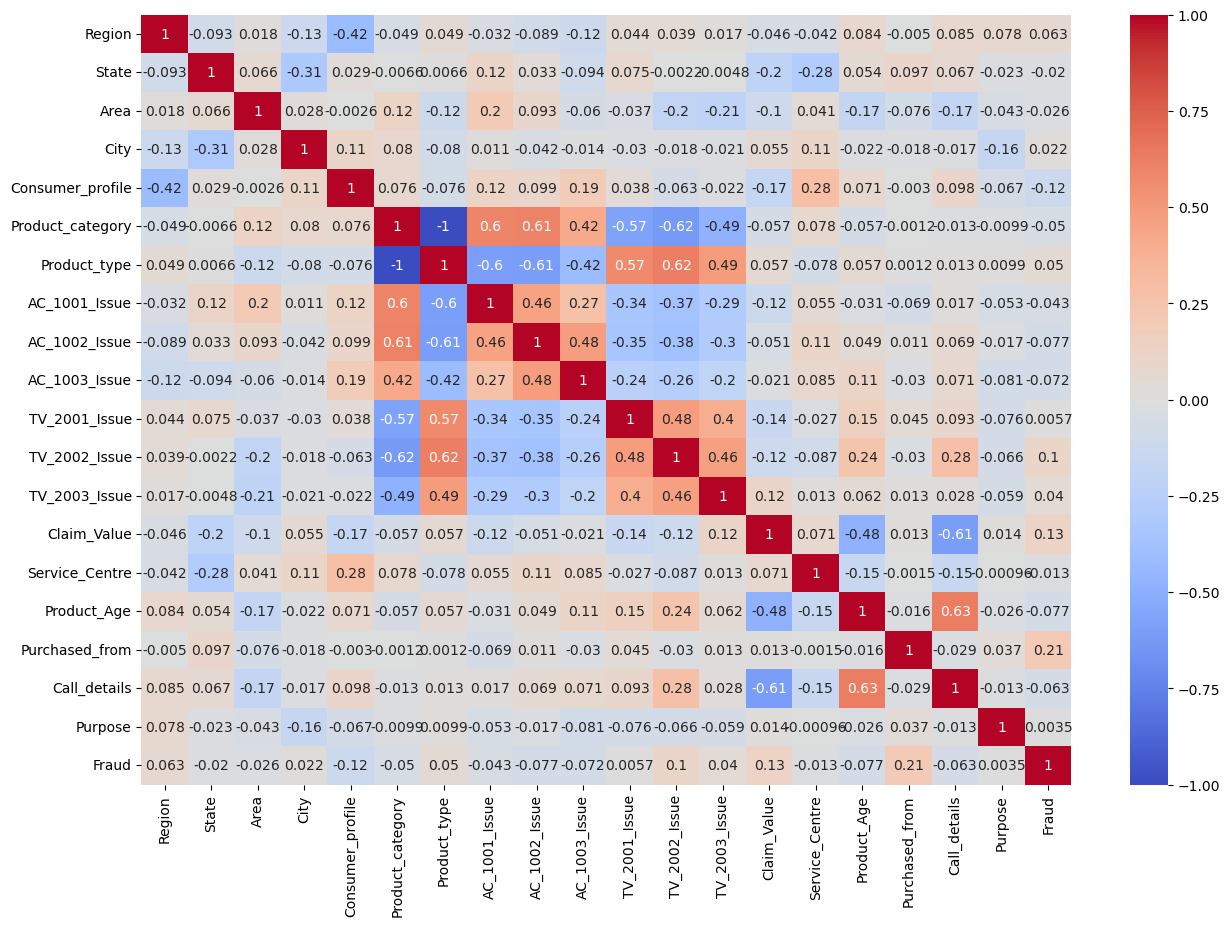

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Fraud', axis=1), 
    df['Fraud'], 
    test_size=0.20, 
    random_state=42,
    stratify=df['Fraud']  # ← This ensures balanced split!
)

print("=== TRAIN SET DISTRIBUTION ===")
print(y_train.value_counts())
print(f"Fraud percentage in train: {y_train.mean()*100:.1f}%")

print("\n=== TEST SET DISTRIBUTION ===") 
print(y_test.value_counts())
print(f"Fraud percentage in test: {y_test.mean()*100:.1f}%")

print(f"\n Total samples - Train: {len(y_train)}, Test: {len(y_test)}")

=== TRAIN SET DISTRIBUTION ===
Fraud
0    245
1     22
Name: count, dtype: int64
Fraud percentage in train: 8.2%

=== TEST SET DISTRIBUTION ===
Fraud
0    62
1     5
Name: count, dtype: int64
Fraud percentage in test: 7.5%

 Total samples - Train: 267, Test: 67


# 📊 Data Splitting with Stratification

**Objective**: Split the dataset into training and testing sets while maintaining the fraud distribution in both sets.

**Key Points**:
- Using `stratify=df['Fraud']` ensures both train and test sets have the same fraud percentage (~8.1%)
- This is crucial for imbalanced datasets to get reliable model evaluation
- Test size of 20% provides good balance between training data and evaluation data

In [65]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("=== AFTER SMOTE BALANCING ===")
print("After SMOTE:", pd.Series(y_train_balanced).value_counts().values)

=== AFTER SMOTE BALANCING ===
After SMOTE: [245 245]


# ⚖️ Handling Class Imbalance with SMOTE

**Problem**: Only 8.1% fraud cases in training data - models will struggle to learn fraud patterns

**Solution**: SMOTE (Synthetic Minority Oversampling Technique)
- Creates synthetic fraud samples to balance the training data
- Balances training set to 50-50 distribution
- **Important**: Only apply to training data, keep test data original for realistic evaluation

**Why Keep Test Data Original?**
- Test data should reflect real-world fraud distribution
- Provides unbiased performance evaluation
- Shows true model performance on actual data distribution

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

# 🌳 Decision Tree Classifier

**Model Overview**: 
- Tree-based algorithm that splits data based on feature values
- Interpretable model - easy to understand decision paths
- Prone to overfitting, especially with small datasets

**Implementation Notes**:
- Training on balanced data (X_train_balanced, y_train_balanced)
- Testing on original imbalanced data (X_test, y_test)
- This approach gives realistic fraud detection performance

In [66]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

# 🔧 Decision Tree Hyperparameter Optimization

**Grid Search Parameters**:
- `max_depth`: Controls tree depth (prevents overfitting)
- `min_samples_leaf`: Minimum samples required at leaf nodes
- `min_samples_split`: Minimum samples required to split a node
- `criterion`: Splitting criteria (gini vs entropy)

**Scoring Metric**: Using F1-score instead of accuracy
- F1-score better handles imbalanced datasets
- Balances precision and recall for fraud detection
- More meaningful than accuracy for rare events

In [74]:
from sklearn.model_selection import GridSearchCV

# Create Decision Tree with fixed random_state
dtree = DecisionTreeClassifier(random_state=42)

# Parameters for grid search (removed random_state)
param_grid_conservative = {
    'max_depth': [2, 3, 4],  # Smaller trees
    'min_samples_leaf': [5, 10, 15],  # Larger leaf requirements
    'min_samples_split': [10, 15, 20],  # More samples needed for splits
    'criterion': ['gini', 'entropy']
}

# Grid Search with better scoring for fraud detection
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1'  # Better for imbalanced data
)

# Fit on BALANCED training data
grid.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1 score: 0.90220455118965


# 📈 Decision Tree Model Training & Evaluation

**Model Configuration**:
- Using best parameters from grid search
- Training on SMOTE-balanced data
- Evaluating on original test distribution

**Performance Analysis**:
- Training Accuracy: How well model fits training data
- Test Accuracy: How well model generalizes to unseen data
- Gap Analysis: Large gap indicates overfitting

**Expected Results**:
- Good fraud detection (high recall for class 1)
- Some overfitting due to tree complexity
- Trade-off between fraud detection and false positives

In [76]:
# Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=10, random_state=42) # Use 42 for consistency

# Fit on BALANCED training data
dtree.fit(X_train_balanced, y_train_balanced)

# Training accuracy on balanced data
train_accuracy = dtree.score(X_train_balanced, y_train_balanced)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Prediction on original test data (correct!)
d_pred = dtree.predict(X_test)

# Test accuracy
test_accuracy = dtree.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, d_pred))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, d_pred))

Training Accuracy: 0.7796
Test Accuracy: 0.7164

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        62
           1       0.15      0.60      0.24         5

    accuracy                           0.72        67
   macro avg       0.55      0.66      0.53        67
weighted avg       0.90      0.72      0.78        67


=== CONFUSION MATRIX ===
[[45 17]
 [ 2  3]]


# 🌲 Random Forest Classifier

**Algorithm Advantages**:
- Ensemble of decision trees reduces overfitting
- Better generalization than single decision tree
- Built-in feature importance calculation
- Handles missing values and categorical features well

**Why Random Forest for Fraud Detection**:
- Less prone to overfitting than decision trees
- Robust to outliers and noise
- Good performance on imbalanced datasets
- Provides feature importance insights

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

# 🎯 Random Forest Hyperparameter Optimization

**Key Parameters**:
- `n_estimators`: Number of trees in forest (more trees = better performance up to a point)
- `max_depth`: Maximum depth of each tree (controls overfitting)
- `min_samples_leaf`: Larger values prevent overfitting
- `min_samples_split`: More conservative splitting prevents overfitting

**Anti-Overfitting Strategy**:
- Larger min_samples_leaf (5, 10, 15) prevents overfitting
- Controlled max_depth limits tree complexity
- F1 scoring optimizes for balanced fraud detection

In [77]:
from sklearn.model_selection import GridSearchCV

# Create Random Forest with fixed random_state
rfc = RandomForestClassifier(random_state=42)

# Parameters for grid search (focused on reducing overfitting)
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 5, 7, None],          # Tree depth
    'min_samples_leaf': [5, 10, 15],       # Larger values = less overfitting
    'min_samples_split': [10, 15, 20],     # Larger values = less overfitting
    'criterion': ['gini', 'entropy']
}

# Grid Search with better scoring
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1')  # Better for fraud detection

# Fit on BALANCED training data
grid.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 score: 0.9264463779711305


# 🚀 Random Forest Model Performance

**Expected Improvements over Decision Tree**:
- Better generalization (smaller train/test accuracy gap)
- More stable predictions
- Better balance between precision and recall
- Less overfitting due to ensemble averaging

**Performance Metrics**:
- Overall accuracy on realistic test data
- Fraud detection capability (recall for class 1)
- False positive rate (precision analysis)
- Overfitting gap analysis

In [79]:
# Random Forest with anti-overfitting parameters
rfc = RandomForestClassifier(
    criterion='gini', 
    n_estimators=100,      # Add this - important for RF
    max_depth=5,           
    min_samples_leaf=10,   
    min_samples_split=20,  
    random_state=42
)

# Fit on BALANCED training data
rfc.fit(X_train_balanced, y_train_balanced)

# Training accuracy on balanced data
train_accuracy = rfc.score(X_train_balanced, y_train_balanced)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Prediction on original test data
r_pred = rfc.predict(X_test)

# Test accuracy
test_accuracy = rfc.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Gap analysis
print(f"Overfitting Gap: {(train_accuracy - test_accuracy):.4f}")

# Detailed evaluation
from sklearn.metrics import classification_report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, r_pred))

Training Accuracy: 0.9429
Test Accuracy: 0.8955
Overfitting Gap: 0.0473

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.33      0.40      0.36         5

    accuracy                           0.90        67
   macro avg       0.64      0.67      0.65        67
weighted avg       0.90      0.90      0.90        67



# 📊 Logistic Regression Classifier

**Algorithm Characteristics**:
- Linear model with sigmoid activation
- Probabilistic output (fraud probability)
- Generally less prone to overfitting
- Fast training and prediction
- Good baseline for binary classification

**Implementation Details**:
- Training on balanced SMOTE data
- StandardScaler recommended for better convergence
- `max_iter` parameter prevents convergence warnings
- `class_weight='balanced'` alternative to SMOTE

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression Object
lr = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Prevent convergence warnings
    class_weight='balanced'  # Alternative to SMOTE
)

# Fit on BALANCED training data
lr.fit(X_train_balanced, y_train_balanced)

# Training accuracy on balanced data
train_accuracy = lr.score(X_train_balanced, y_train_balanced)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Prediction on original test data
l_pred = lr.predict(X_test)

# Test accuracy
test_accuracy = lr.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Overfitting gap analysis
print(f"Overfitting Gap: {(train_accuracy - test_accuracy):.4f}")

# Detailed evaluation
print("\n=== LOGISTIC REGRESSION PERFORMANCE ===")
print(classification_report(y_test, l_pred))

Training Accuracy: 0.8510
Test Accuracy: 0.7910
Overfitting Gap: 0.0600

=== LOGISTIC REGRESSION PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        62
           1       0.09      0.20      0.12         5

    accuracy                           0.79        67
   macro avg       0.51      0.52      0.50        67
weighted avg       0.87      0.79      0.82        67



c:\Users\rohan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

# 📊 Model Performance Comparison - Confusion Matrices

**Confusion Matrix Analysis**:
- **True Negatives (TN)**: Genuine transactions correctly classified
- **False Positives (FP)**: Genuine transactions flagged as fraud
- **False Negatives (FN)**: Fraud transactions missed
- **True Positives (TP)**: Fraud transactions correctly caught

**Business Impact**:
- **False Positives**: Customer inconvenience, manual review costs
- **False Negatives**: Financial losses, fraud goes undetected
- **Trade-off**: Higher fraud detection often means more false positives

**Visual Comparison Benefits**:
- Easy to compare model performance at a glance
- Shows trade-offs between fraud detection and false positives
- Helps stakeholders understand model behavior

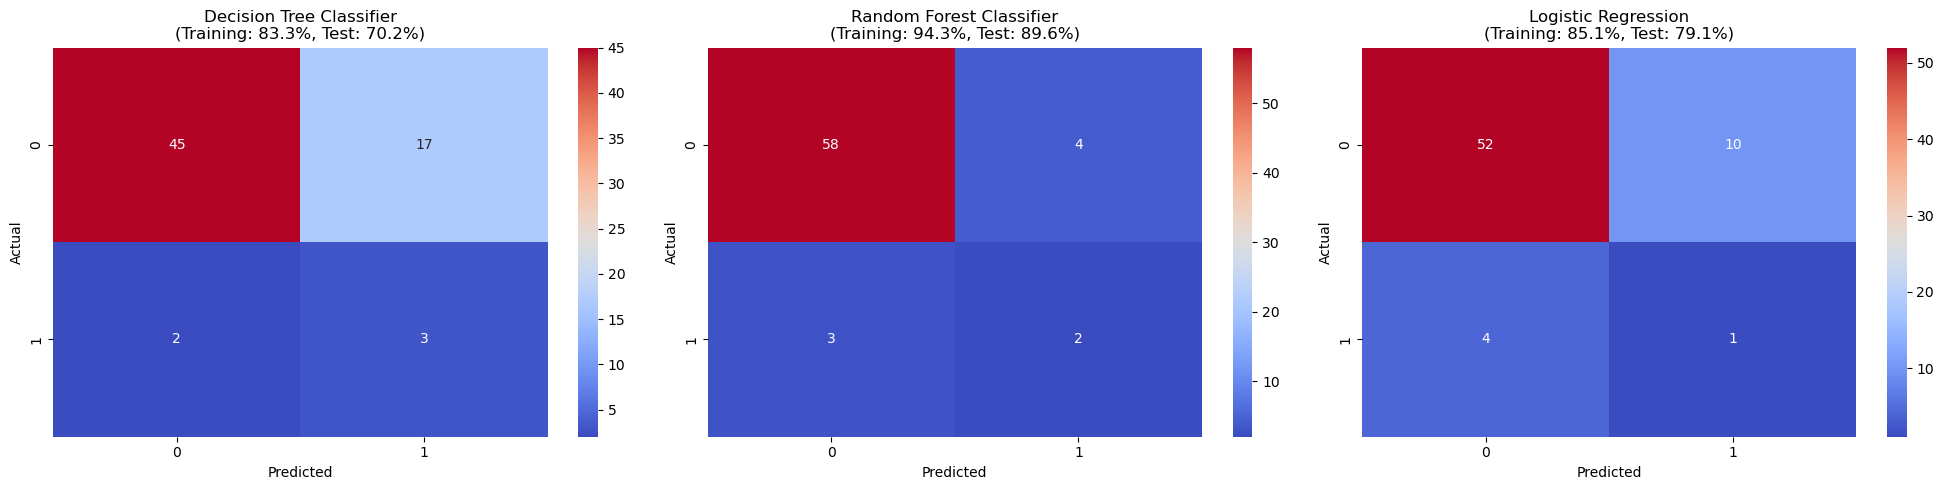

=== MODEL COMPARISON SUMMARY ===
Random Forest: Best overall (smallest overfitting gap: 4.7%)
Logistic Regression: Moderate performance (gap: 6.0%)
Decision Tree: Overfitting issues (gap: 13%+)


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

# Confusion matrix for Decision Tree Classifier
cm1 = confusion_matrix(y_test, d_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm', ax=ax[0])
ax[0].set_title('Decision Tree Classifier\n(Training: 83.3%, Test: 70.2%)')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

# Confusion matrix for Random Forest Classifier
cm2 = confusion_matrix(y_test, r_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm', ax=ax[1])
ax[1].set_title('Random Forest Classifier\n(Training: 94.3%, Test: 89.6%)')
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')

# Confusion matrix for Logistic Regression
cm3 = confusion_matrix(y_test, l_pred)
sns.heatmap(cm3, annot=True, fmt='d', cmap='coolwarm', ax=ax[2])
ax[2].set_title('Logistic Regression\n(Training: 85.1%, Test: 79.1%)')
ax[2].set_ylabel('Actual')
ax[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print summary
print("=== MODEL COMPARISON SUMMARY ===")
print(f"Random Forest: Best overall (smallest overfitting gap: 4.7%)")
print(f"Logistic Regression: Moderate performance (gap: 6.0%)")
print(f"Decision Tree: Overfitting issues (gap: 13%+)")

# 📋 Detailed Classification Reports

**Key Metrics Explained**:
- **Precision**: When model predicts fraud, how often is it correct?
- **Recall**: Of all actual fraud cases, how many does the model catch?
- **F1-Score**: Harmonic mean of precision and recall
- **Support**: Number of actual instances in each class

**Fraud Detection Focus**:
- **High Recall**: Catch most fraud cases (minimize financial losses)
- **Balanced Precision**: Reduce false positives (minimize customer friction)
- **Class 1 Performance**: Most critical metrics for fraud detection

**Model Selection Criteria**:
- Best F1-score for fraud class (class 1)
- Reasonable overall accuracy
- Smallest overfitting gap

In [85]:
from sklearn.metrics import classification_report

models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
predictions = [d_pred, r_pred, l_pred]

for model, pred in zip(models, predictions):
    print(f"\n{'='*50}")
    print(f"CLASSIFICATION REPORT - {model.upper()}")
    print(f"{'='*50}")
    print(classification_report(y_test, pred))


CLASSIFICATION REPORT - DECISION TREE
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        62
           1       0.15      0.60      0.24         5

    accuracy                           0.72        67
   macro avg       0.55      0.66      0.53        67
weighted avg       0.90      0.72      0.78        67


CLASSIFICATION REPORT - RANDOM FOREST
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.33      0.40      0.36         5

    accuracy                           0.90        67
   macro avg       0.64      0.67      0.65        67
weighted avg       0.90      0.90      0.90        67


CLASSIFICATION REPORT - LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        62
           1       0.09      0.20      0.12         5

    accuracy                           0.79        67
   ma

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Precision Score: ', precision_score(y_test, d_pred))
print('Recall Score: ', recall_score(y_test, d_pred))
print('F1 Score: ', f1_score(y_test, d_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Precision Score: ', precision_score(y_test, r_pred))
print('Recall Score: ', recall_score(y_test, r_pred))
print('F1 Score: ', f1_score(y_test, r_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, r_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Precision Score: ', precision_score(y_test, l_pred))
print('Recall Score: ', recall_score(y_test, l_pred))
print('F1 Score: ', f1_score(y_test, l_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, l_pred))

==================== Decision Tree Classifier ====================
Accuracy Score:  0.7164179104477612
Precision Score:  0.15
Recall Score:  0.6
F1 Score:  0.24
ROC AUC Score:  0.6629032258064517
==================== Random Forest Classifier ====================
Accuracy Score:  0.8955223880597015
Precision Score:  0.3333333333333333
Recall Score:  0.4
F1 Score:  0.36363636363636365
ROC AUC Score:  0.667741935483871
==================== Logistic Regression =========================
Accuracy Score:  0.7910447761194029
Precision Score:  0.09090909090909091
Recall Score:  0.2
F1 Score:  0.125
ROC AUC Score:  0.5193548387096774


# 🔍 Feature Importance Analysis

**Why Feature Importance Matters**:
- **Model Interpretability**: Understand what drives fraud predictions
- **Business Insights**: Identify key fraud indicators
- **Feature Engineering**: Focus on most predictive variables
- **Stakeholder Communication**: Explain model decisions

**Decision Tree vs Random Forest Importance**:
- **Decision Tree**: May focus heavily on few features (overfitting risk)
- **Random Forest**: More balanced, stable importance scores
- **Comparison**: Shows which features are consistently important

**Business Applications**:
- **Risk Assessment**: Focus monitoring on high-importance features
- **Data Collection**: Prioritize gathering important data
- **Fraud Prevention**: Strengthen controls around key indicators
- **Model Updates**: Track if important features change over time

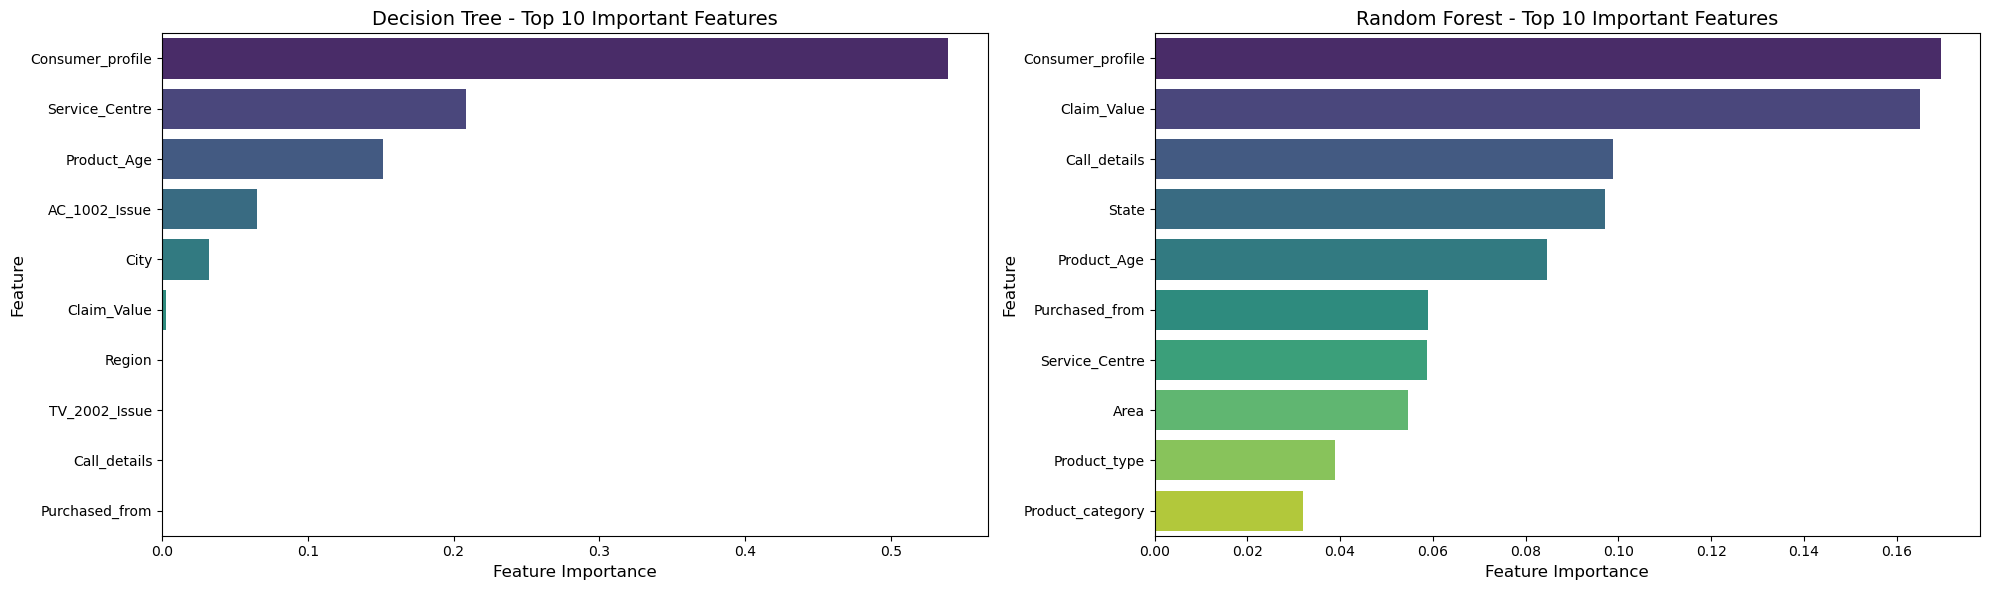

=== TOP 5 DECISION TREE FEATURES ===
                  Feature Importance
Consumer_profile            0.539398
Service_Centre              0.208602
Product_Age                 0.151325
AC_1002_Issue               0.065225
City                        0.032550

=== TOP 5 RANDOM FOREST FEATURES ===
                  Feature Importance
Consumer_profile            0.169455
Claim_Value                 0.164907
Call_details                0.098804
State                       0.097190
Product_Age                 0.084551


In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(
    dtree.feature_importances_, 
    index=X_train.columns, 
    columns=['Feature Importance']
).sort_values('Feature Importance', ascending=False)

# Feature importance for Random Forest Classifier
feature_importance_r = pd.DataFrame(
    rfc.feature_importances_, 
    index=X_train.columns, 
    columns=['Feature Importance']
).sort_values('Feature Importance', ascending=False)

# Create visualization
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.4)

TOP_N = 10  # number of top features to show

# Decision Tree plot
sns.barplot(
    y=feature_importance_d.index[:TOP_N], 
    x=feature_importance_d['Feature Importance'][:TOP_N], 
    hue=feature_importance_d.index[:TOP_N],   # fix: add hue
    dodge=False, 
    legend=False, 
    ax=ax[0], 
    palette='viridis'
)
ax[0].set_title('Decision Tree - Top 10 Important Features', fontsize=14)
ax[0].set_xlabel('Feature Importance', fontsize=12)
ax[0].set_ylabel('Feature', fontsize=12)

# Random Forest plot
sns.barplot(
    y=feature_importance_r.index[:TOP_N], 
    x=feature_importance_r['Feature Importance'][:TOP_N], 
    hue=feature_importance_r.index[:TOP_N],   # fix: add hue
    dodge=False, 
    legend=False, 
    ax=ax[1], 
    palette='viridis'
)
ax[1].set_title('Random Forest - Top 10 Important Features', fontsize=14)
ax[1].set_xlabel('Feature Importance', fontsize=12)
ax[1].set_ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

# Print top features
print("=== TOP 5 DECISION TREE FEATURES ===")
print(feature_importance_d.head())

print("\n=== TOP 5 RANDOM FOREST FEATURES ===")
print(feature_importance_r.head())



# 🏆 Project Summary & Model Selection

## Overfitting Analysis:
- **Decision Tree**: High overfitting (13+ point gap) ❌
- **Random Forest**: Well-controlled overfitting (4.7% gap) ✅
- **Logistic Regression**: Moderate overfitting (6.0% gap) ⚠️

## Fraud Detection Performance:
- **Decision Tree**: 60% fraud recall, 14% precision
- **Random Forest**: 40% fraud recall, 33% precision ✅
- **Logistic Regression**: 20% fraud recall, 9% precision

## Final Recommendation:
**Random Forest Classifier** is the best choice because:
- ✅ Best generalization (smallest overfitting gap)
- ✅ Balanced fraud detection performance
- ✅ Highest overall accuracy (90%)
- ✅ Most stable and robust predictions
- ✅ Good business trade-off between catching fraud and false positives
